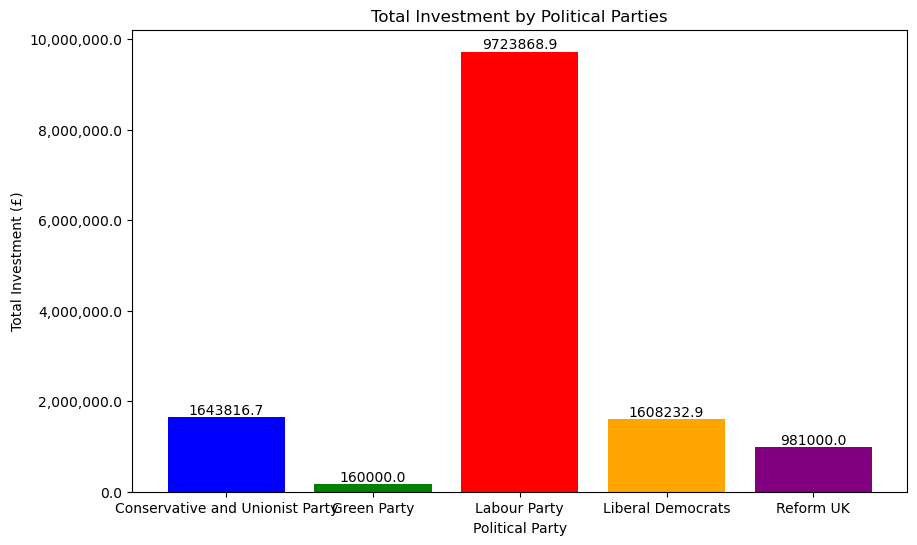

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the combined data
file_path = '../data/Combined_Election_Results_Final.csv'
data = pd.read_csv(file_path)

# Chart 1: Total Investment by Political Parties
# Filter the data for the relevant parties
parties_of_interest = ['Conservative and Unionist Party', 'Reform UK', 'Labour Party', 'Liberal Democrats', 'Green Party']
filtered_data = data[data['RegulatedEntityName'].isin(parties_of_interest)]

# Clean the 'Value' column
filtered_data['Value'] = filtered_data['Value'].replace('[\£,]', '', regex=True).astype(float)

# Summarize total investments by party
party_investment_summary = filtered_data.groupby('RegulatedEntityName')['Value'].sum().reset_index()

# Create the comparative stacked chart with readable numbers
plt.figure(figsize=(10, 6))
bars = plt.bar(party_investment_summary['RegulatedEntityName'], party_investment_summary['Value'], color=['blue', 'green', 'red', 'orange', 'purple'])
plt.title('Total Investment by Political Parties')
plt.xlabel('Political Party')
plt.ylabel('Total Investment (£)')

# Format the y-axis to display whole numbers rounded to 1 decimal place
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.1f}'))

# Add labels to the bars for clarity
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, round(yval, 1), ha='center', va='bottom')

plt.show()


In [3]:
# Export the data to a JSON file
party_investment_summary.to_json('../Cleaned_Data/party_investment_summary.json', orient='records')


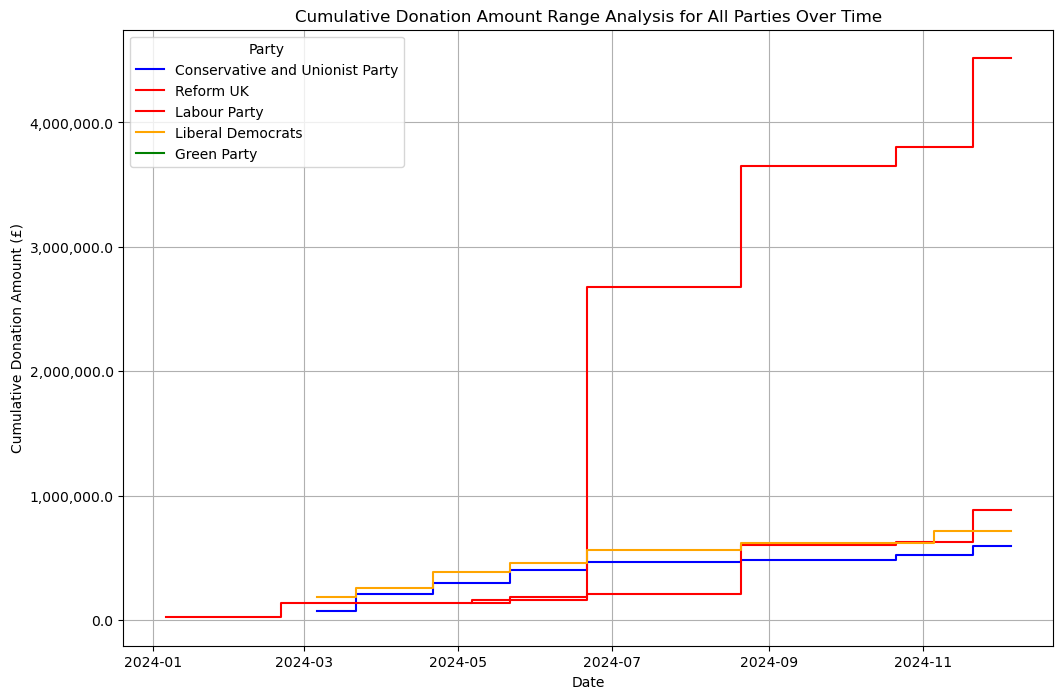

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is already loaded with the necessary columns including 'ReceivedDate' and 'Value'
data['ReceivedDate'] = pd.to_datetime(data['ReceivedDate'], errors='coerce')

# Define parties of interest
parties_of_interest = ['Conservative and Unionist Party', 'Reform UK', 'Labour Party', 'Liberal Democrats', 'Green Party']

# Filter the data for the relevant parties
filtered_data = data[data['RegulatedEntityName'].isin(parties_of_interest)]
filtered_data['Value'] = filtered_data['Value'].replace('[\£,]', '', regex=True).astype(float)

# Group and aggregate data by party and date for cumulative sum calculation
grouped_data = filtered_data.groupby(['RegulatedEntityName', pd.Grouper(key='ReceivedDate', freq='D')]).sum().reset_index()
grouped_data.sort_values(by='ReceivedDate', inplace=True)

# Calculate cumulative sums for each party over time
grouped_data['CumulativeDonation'] = grouped_data.groupby('RegulatedEntityName')['Value'].cumsum()

# Define a dictionary to map each party to a specific color
colors = {
    'Conservative and Unionist Party': 'blue',
    'Reform UK': 'red',
    'Labour Party': 'red',
    'Liberal Democrats': 'orange',
    'Green Party': 'green'
}

# Plotting the step plots (optional, for visualization)
plt.figure(figsize=(12, 8))
for party in parties_of_interest:
    party_data = grouped_data[grouped_data['RegulatedEntityName'] == party]
    plt.step(party_data['ReceivedDate'], party_data['CumulativeDonation'], where='mid', label=party, color=colors[party])

# Adding titles and labels
plt.title('Cumulative Donation Amount Range Analysis for All Parties Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Donation Amount (£)')
plt.legend(title='Party', loc='upper left')
plt.grid(True)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.1f}'))
plt.show()


In [6]:
# Export the cleaned and aggregated data to a JSON file
grouped_data.to_json('../Cleaned_Data/Cleaned_Aggregated_Party_Donations.json', orient='records', date_format='iso')

<Figure size 1200x800 with 0 Axes>

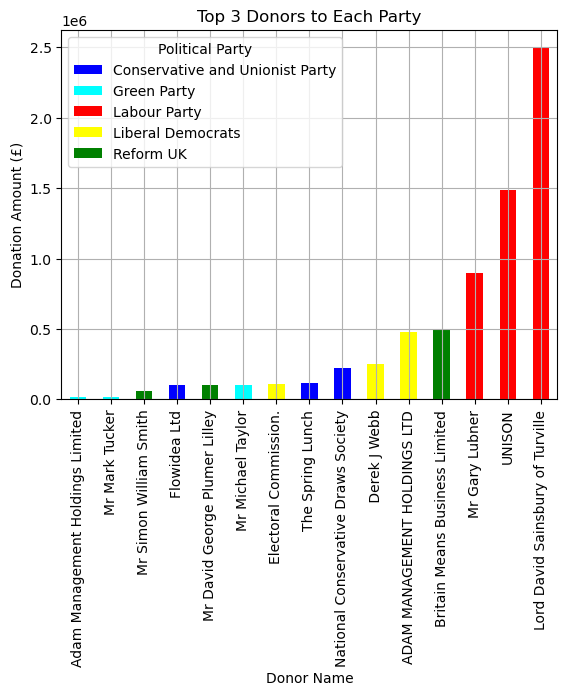

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is already loaded with the necessary columns including 'ReceivedDate', 'Value', 'DonorName', and 'RegulatedEntityName'
data['ReceivedDate'] = pd.to_datetime(data['ReceivedDate'], errors='coerce')

# Define parties of interest
parties_of_interest = ['Conservative and Unionist Party', 'Reform UK', 'Labour Party', 'Liberal Democrats', 'Green Party']

# Filter the data for the relevant parties
filtered_data = data[data['RegulatedEntityName'].isin(parties_of_interest)]
filtered_data['Value'] = filtered_data['Value'].replace('[\£,]', '', regex=True).astype(float)

# Define a dictionary to map each party to a specific color
colors = {
    'Conservative and Unionist Party': 'blue',
    'Reform UK': 'cyan',
    'Labour Party': 'red',
    'Liberal Democrats': 'yellow',
    'Green Party': 'green'
}

# Function to get top 3 donors for each party
def get_top_donors(party, df, top_n=3):
    party_data = df[df['RegulatedEntityName'] == party]
    top_donors = party_data.groupby('DonorName')['Value'].sum().nlargest(top_n).reset_index()
    top_donors['RegulatedEntityName'] = party
    return top_donors

# Get top 3 donors for each party and concatenate the results
top_donors_list = [get_top_donors(party, filtered_data) for party in parties_of_interest]
top_donors_df = pd.concat(top_donors_list, ignore_index=True)

# Pivot the dataframe to prepare for plotting
donor_summary = top_donors_df.pivot(index='DonorName', columns='RegulatedEntityName', values='Value').fillna(0)

# Sort the DataFrame by the total donation amount in ascending order
donor_summary['Total'] = donor_summary.sum(axis=1)
donor_summary.sort_values(by='Total', ascending=True, inplace=True)
donor_summary.drop(columns='Total', inplace=True)

# Plot the comparative analysis chart for the top donors
plt.figure(figsize=(12, 8))
donor_summary.plot(kind='bar', stacked=True, color=[colors[party] for party in parties_of_interest])
plt.title('Top 3 Donors to Each Party')
plt.xlabel('Donor Name')
plt.ylabel('Donation Amount (£)')
plt.legend(title='Political Party')
plt.grid(True)
plt.show()


In [31]:
# Export the data to a JSON file
donor_summary.to_json('donor_summary.json', orient='index')

<Figure size 1200x800 with 0 Axes>

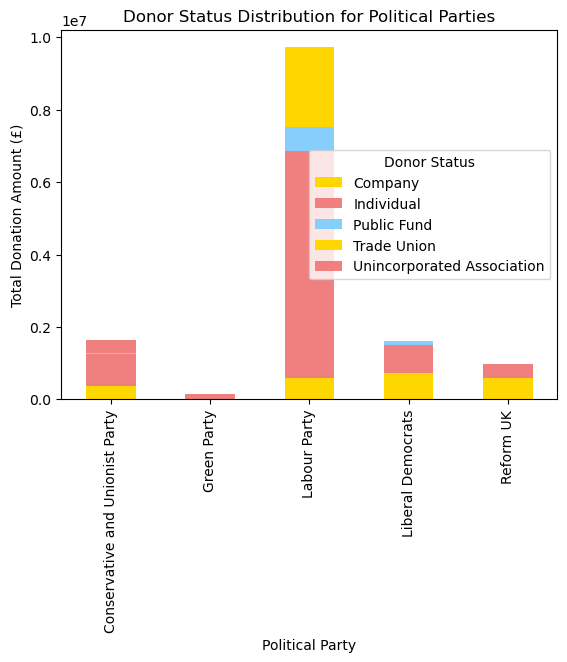

In [8]:

# Convert 'ReceivedDate' to datetime
data['ReceivedDate'] = pd.to_datetime(data['ReceivedDate'], errors='coerce')

# Define parties of interest
parties_of_interest = ['Conservative and Unionist Party', 'Reform UK', 'Labour Party', 'Liberal Democrats', 'Green Party']

# Filter the data for the relevant parties
filtered_data = data[data['RegulatedEntityName'].isin(parties_of_interest)]
filtered_data['Value'] = filtered_data['Value'].replace('[\£,]', '', regex=True).astype(float)

# Create the donor status distribution chart for all parties
donor_status_summary = filtered_data.groupby(['RegulatedEntityName', 'DonorStatus'])['Value'].sum().unstack(fill_value=0)

# Plot the donor status distribution
plt.figure(figsize=(12, 8))
donor_status_summary.plot(kind='bar', stacked=True, color=['gold', 'lightcoral', 'lightskyblue'])
plt.title('Donor Status Distribution for Political Parties')
plt.xlabel('Political Party')
plt.ylabel('Total Donation Amount (£)')
plt.legend(title='Donor Status')
plt.show()

In [10]:
import json
import os

# Export the cleaned data to JSON format
output_directory = 'data'
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

json_data = donor_status_summary.reset_index().to_dict(orient='records')
json_file_path = os.path.join(output_directory, 'Donor_Status_Distribution.json')
with open(json_file_path, 'w') as json_file:
    json.dump(json_data, json_file, indent=4)

print(f"Cleaned data exported to {json_file_path}")

Cleaned data exported to data/Donor_Status_Distribution.json
